In [3]:
!pip install streamlit textblob vaderSentiment clean-text matplotlib pandas
import streamlit as st
from textblob import TextBlob
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import cleantext
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=9b78f59ca6c7dce25cfab159e0d8c564c9a609cce15100d132822392077208e5
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [4]:
# Load the dataset
df = pd.read_csv("Reviews.csv")

In [5]:
# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Analyze sentiment and subjectivity
sentiment_scores = []
blob_subj = []
review_text = df["Text"]
for review in review_text:
    sentiment_scores.append(analyzer.polarity_scores(review)["compound"])
    blob = TextBlob(review)
    blob_subj.append(blob.subjectivity)

In [8]:
# Classify sentiment based on VADER scores
sentiment_classes = []
for sentiment_score in sentiment_scores:
    if sentiment_score > 0.8:
        sentiment_classes.append("highly positive")
    elif sentiment_score > 0.4:
        sentiment_classes.append("positive")
    elif -0.4 <= sentiment_score <= 0.4:
        sentiment_classes.append("neutral")
    elif sentiment_score < -0.4:
        sentiment_classes.append("negative")
    else:
        sentiment_classes.append("highly negative")

In [11]:
# Streamlit app
st.title("Sentiment Analysis On Customer Feedback")

DeltaGenerator()

In [13]:

# Take input from the user
user_input = st.text_area("Enter customer feedback:")
blob = TextBlob(user_input)

user_sentiment_score = analyzer.polarity_scores(user_input)["compound"]
if user_sentiment_score > 0.8:
    user_sentiment_class = "highly positive"
elif user_sentiment_score > 0.4:
    user_sentiment_class = "positive"
elif -0.4 <= user_sentiment_score <= 0.4:
    user_sentiment_class = "neutral"
elif user_sentiment_score < -0.4:
    user_sentiment_class = "negative"
else:
    user_sentiment_class = "highly negative"

st.write("**VADER Sentiment Class:** ", user_sentiment_class, "\n**VADER Sentiment Scores:**", user_sentiment_score)
st.write("**TextBlob Polarity**", blob.sentiment.polarity, "\n**TextBlob Subjectivity:**", blob.sentiment.subjectivity)

DeltaGenerator()

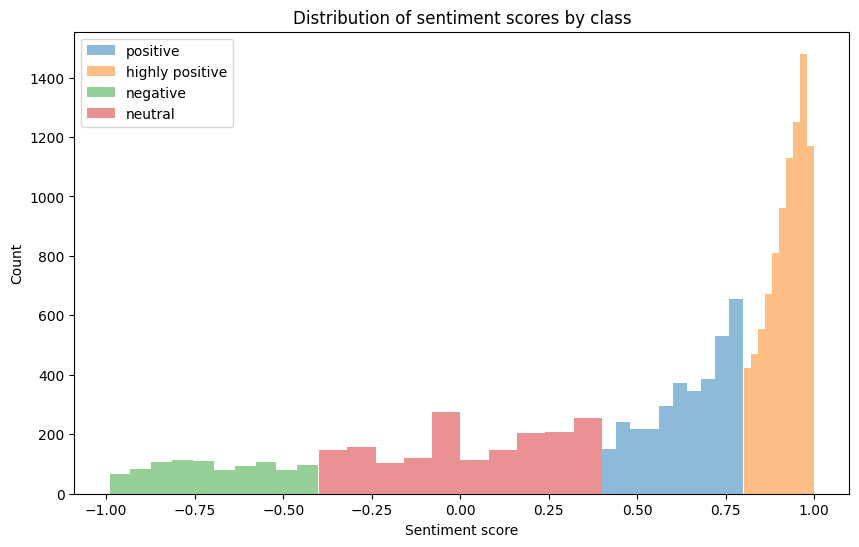

In [14]:
# Display clean text
pre = st.text_input('Clean Text: ')
if pre:
    st.write(cleantext.clean(pre, clean_all=False, extra_spaces=True, stopwords=True, lowercase=True, numbers=True, punct=True))
else:
    st.write("No text provided for cleaning.")

# Graphical Representation of Data
st.subheader("Graphical Representation of Data")
plt.figure(figsize=(10, 6))

sentiment_scores_by_class = {k: [] for k in set(sentiment_classes)}
for sentiment_score, sentiment_class in zip(sentiment_scores, sentiment_classes):
    sentiment_scores_by_class[sentiment_class].append(sentiment_score)

for sentiment_class, scores in sentiment_scores_by_class.items():
    plt.hist(scores, label=sentiment_class, alpha=0.5)

plt.xlabel("Sentiment score")
plt.ylabel("Count")
plt.title("Distribution of sentiment scores by class")
plt.legend()
st.pyplot(plt)

In [18]:
# DataFrame with sentiment analysis results
df["Sentiment Class"] = sentiment_classes
df["Sentiment Score"] = sentiment_scores
df["Subjectivity"] = blob_subj

new_df = df[["Score", "Text", "Sentiment Score", "Sentiment Class", "Subjectivity"]]
st.subheader("Input Dataframe")
st.dataframe(new_df.head(30), use_container_width=True)

DeltaGenerator()